# **Starbucks Stock Market Prediction 📈**

Importing neccessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

loading the Data

In [ ]:
df = pd.read_csv('/content/Starbucks Dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.260703,224358400
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.278891,58732800
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.269797,34777600
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.275860,18316800
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.275860,13996800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8036 non-null   object 
 1   Open       8036 non-null   float64
 2   High       8036 non-null   float64
 3   Low        8036 non-null   float64
 4   Close      8036 non-null   float64
 5   Adj Close  8036 non-null   float64
 6   Volume     8036 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 439.6+ KB


In [ ]:
#anyway, remember to convert to datetime!!!
df["Date"] = pd.to_datetime(df["Date"])
x = df["Date"]
print(x)

0      1992-06-26
1      1992-06-29
2      1992-06-30
3      1992-07-01
4      1992-07-02
          ...    
8031   2024-05-17
8032   2024-05-20
8033   2024-05-21
8034   2024-05-22
8035   2024-05-23
Name: Date, Length: 8036, dtype: datetime64[ns]


# **Trend Analysis**

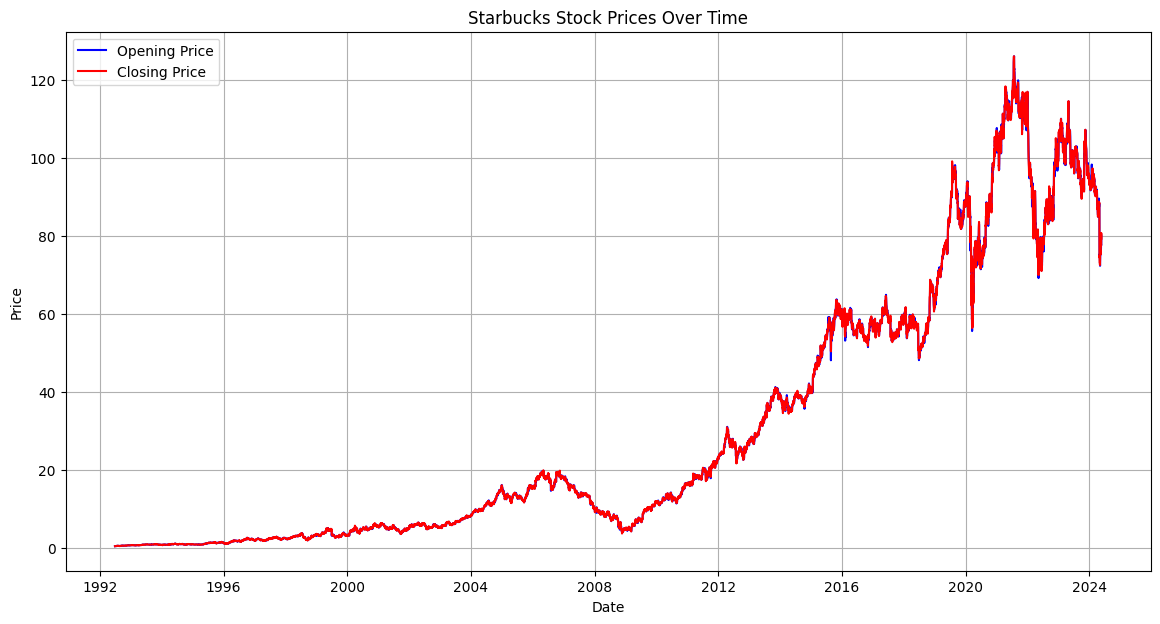

In [ ]:
# Plot the data
plt.figure(figsize=(14, 7))

# Plot opening prices
plt.plot(df['Date'], df['Open'], label='Opening Price', color='blue', linewidth=1.5)

# Plot closing prices
plt.plot(df['Date'], df['Close'], label='Closing Price', color='red', linewidth=1.5)

# Add title and labels
plt.title('Starbucks Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


**Trends:**

**General Upward Trend:** Over the entire period, the overall trend is upward, indicating growth in the stock price.

**Volatility in Recent Years:** There are more significant fluctuations in the stock price in recent years, showing higher volatility.

**Summary:**

The stock price of Starbucks has generally increased from 1992 to 2024.

There has been significant growth, especially after 2008.

Recent years show higher volatility, with noticeable peaks and drops in the stock price.

# **Correlation Analysis**

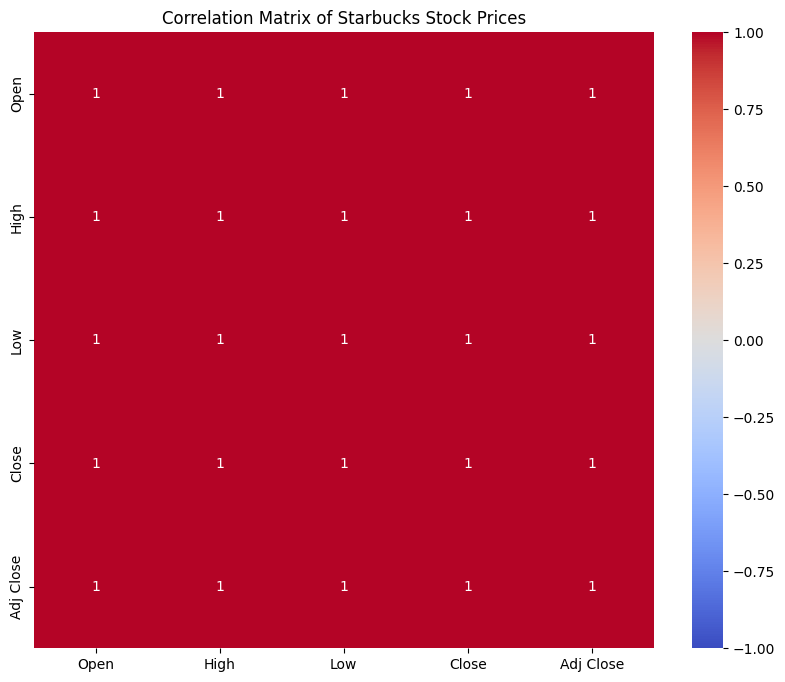

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Starbucks Stock Prices')
plt.show()

In [ ]:
print(correlation_matrix)

               Open      High       Low     Close  Adj Close
Open       1.000000  0.999935  0.999924  0.999858   0.997838
High       0.999935  1.000000  0.999898  0.999931   0.997945
Low        0.999924  0.999898  1.000000  0.999930   0.997872
Close      0.999858  0.999931  0.999930  1.000000   0.997965
Adj Close  0.997838  0.997945  0.997872  0.997965   1.000000


**Correlation Analysis Summary**

Based on the correlation matrix provided, there is a very high correlation between the stock prices at different times of the trading day ('Open', 'High', 'Low', 'Close', and 'Adj Close').

The correlation coefficients are extremely close to 1, indicating that these prices move in a nearly identical manner throughout the trading day.

In [ ]:
# Calculate the moving averages
df['MA_20'] = df['Close'].rolling(window=20).mean()  # 20-day moving average
df['MA_50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average

# Create the plot
fig = px.line(df, x='Date', y=['Close', 'MA_20', 'MA_50'],
              labels={'value': 'Price', 'variable': 'Legend'},
              title='Starbucks Stock Prices and Moving Averages')

# Customize the plot
fig.update_layout(legend_title_text='Legend', xaxis_title='Date', yaxis_title='Price')
fig.update_traces(line=dict(width=1.5))

# Show the plot
fig.show()

# **Regression Analysis**

In [ ]:
from sklearn.linear_model import LinearRegression


# Convert the 'Date' column to ordinal for regression analysis
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Define the features and target variable
features = ['Date_ordinal', 'Open', 'High', 'Low', 'Volume']
target = 'Close'

# Prepare the data for regression
X = df[features].values  # Independent variables
y = df[target].values    # Dependent variable (closing prices)

# Perform linear regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Add the regression line to the dataframe
df['Regression'] = y_pred

# Create the plot
fig = px.scatter(df, x='Date', y='Close', title='Starbucks Stock Prices with Regression Line')
fig.add_scatter(x=df['Date'], y=df['Regression'], name='Regression Line', line=dict(color='red'))

# Customize the plot
fig.update_layout(legend_title_text='Legend', xaxis_title='Date', yaxis_title='Price')

# Show the plot
fig.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate R-squared and MSE
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")

R-squared: 0.9999413900475208
Mean Squared Error (MSE): 0.06622273289685074


**Model Building and Evaluation**

A linear regression model was successfully built using the provided training data. The model was then evaluated on the testing data to assess its performance.



**Evaluation Metrics**

**Mean Squared Error (MSE):** The model achieved a very low MSE of **0.0662231**, indicating that the predictions are very close to the actual values.

**R^2 Score:** The model has an R^2 Score of **0.999941**, which is extremely close to 1. This suggests that the model explains nearly all the variability of the response data around its mean.